In [2]:
import numpy as np
from Util import *
from datetime import datetime


In [ ]:

# Set random seed for reproducibility
np.random.seed(np.random.randint(1, 1000000))

params = {
    'n_customers': 10000,
    'ctr_probs': {
        'Low_CTR': 0.05,
        'Medium_CTR': 0.10,
        'High_CTR': 0.15
    },
    'treatment_effects': {
        'Low_CTR': 0.025,     # +2% for Low_CTR
        'Medium_CTR': 0.025, # +1.5% for Medium_CTR
        'High_CTR': 0.025    # +1% for High_CTR
    },
    'treatment_mix': {
        'High_CTR': 0.3,    
        'Medium_CTR': 0.5,  
        'Low_CTR': 0.7     
    },
    'views_range': (1, 1000),
    'n_products': 1000,
    'click_delay_range': (1, 604800),
    'start_date': datetime(2024, 1, 1),
    'end_date': datetime(2024, 1, 7, 23, 59, 59)
}

# Generate data
customer_segments = create_customer_segments(params['n_customers'])
df = generate_data(
    customer_segments,
    params['start_date'],
    params['end_date'],
    params['ctr_probs'],
    params['treatment_effects'],
    params['treatment_mix'],
    params['views_range'],
    params['n_products'],
    params['click_delay_range']
)



Available customers per segment:
Low_CTR: 3333
Medium_CTR: 3334
High_CTR: 3333
Minimum segment size: 3333


In [ ]:
# Run analyses
print_basic_statistics(df)
df = calculate_ctr_metrics(df)
ctr_stats = calculate_detailed_ctr(df)
treatment_effects = calculate_treatment_effect(ctr_stats)
print_treatment_effects(treatment_effects)
summary_table = create_summary_table(treatment_effects)
analyze_post_trigger_difference(df)


BASIC STATISTICS
Number of unique customers: 10000

Data Shape: (5017910, 7)

Customer Segments Distribution:
customer_segment
Medium_CTR    0.333
High_CTR      0.333
Low_CTR       0.333
Name: proportion, dtype: float64

Treatment Assignment by Segment:
customer_segment  group
High_CTR          C        1000
                  T        2333
Low_CTR           C        2334
                  T         999
Medium_CTR        C        1668
                  T        1666
Name: customer_id, dtype: int64

Treatment Ratios by Segment:
group                C     T  total  T_ratio
customer_segment                            
High_CTR          1000  2333   3333      0.7
Low_CTR           2334   999   3333      0.3
Medium_CTR        1668  1666   3334      0.5


CTR ANALYSIS

Overall CTR:
9.991%

CTR by Segment:
                  total_views  total_clicks     CTR
customer_segment                                   
High_CTR              1670467        250674  15.006
Low_CTR               1692472     


Actual y-limits set in plot:
Lower y-limit: -11.194936
Upper y-limit: 11.194936


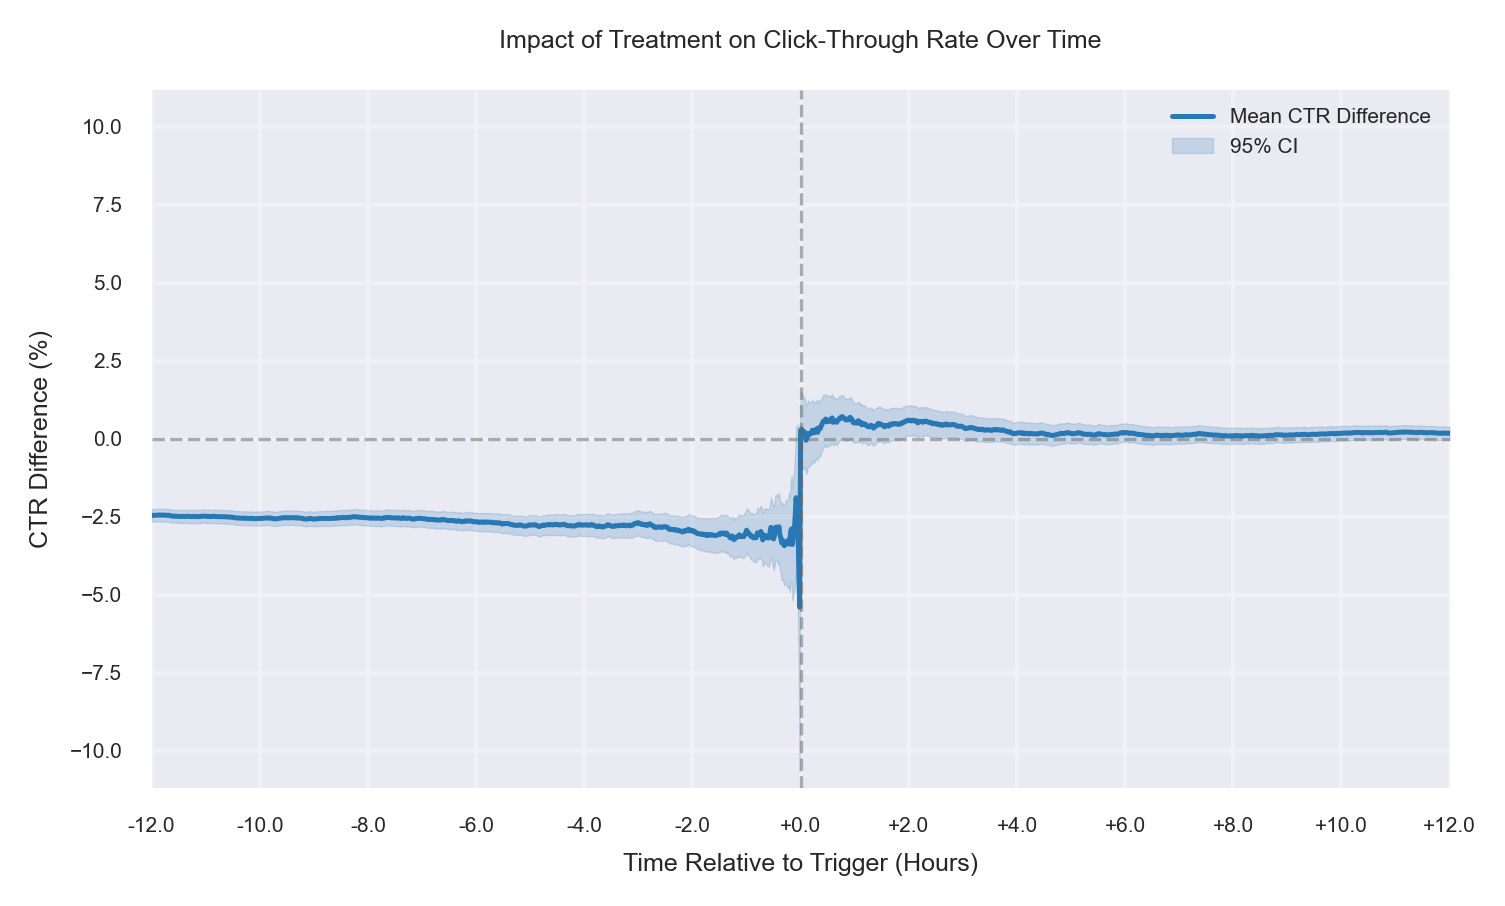

In [ ]:
# Time-based analysis
pivot_df_window, se = prepare_time_based_analysis(df, n_minutes=720)  # 12 hours
fig = plot_time_based_ctr(pivot_df_window, se, n_minutes=720)
plt.show()

fig.savefig(
    "/Users/ebenezer/Documents/1A/ScolarlyArticle/ABTest_vis/10.png",
    dpi=300,
    bbox_inches="tight"
)



Actual y-limits set in plot:
Lower y-limit: -7.919522
Upper y-limit: 7.919522


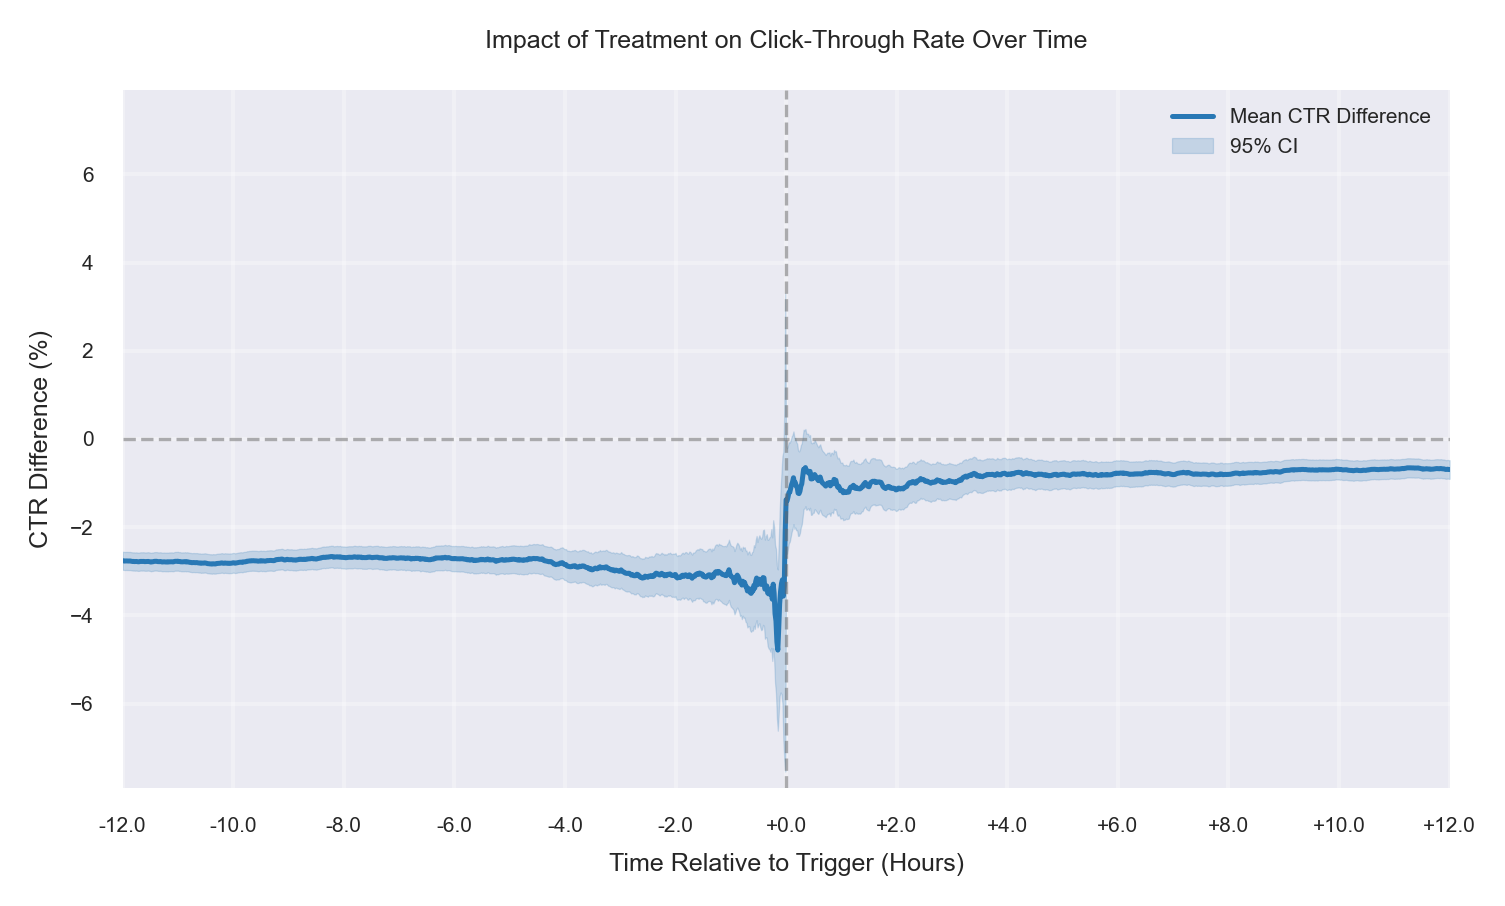

In [6]:

pivot_df_window, se = prepare_time_based_analysis(df, n_minutes=720)  # 12 hours
fig = plot_time_based_ctr(pivot_df_window, se, n_minutes=720)
plt.show()


Actual y-limits set in plot:
Lower y-limit: -7.919522
Upper y-limit: 7.919522


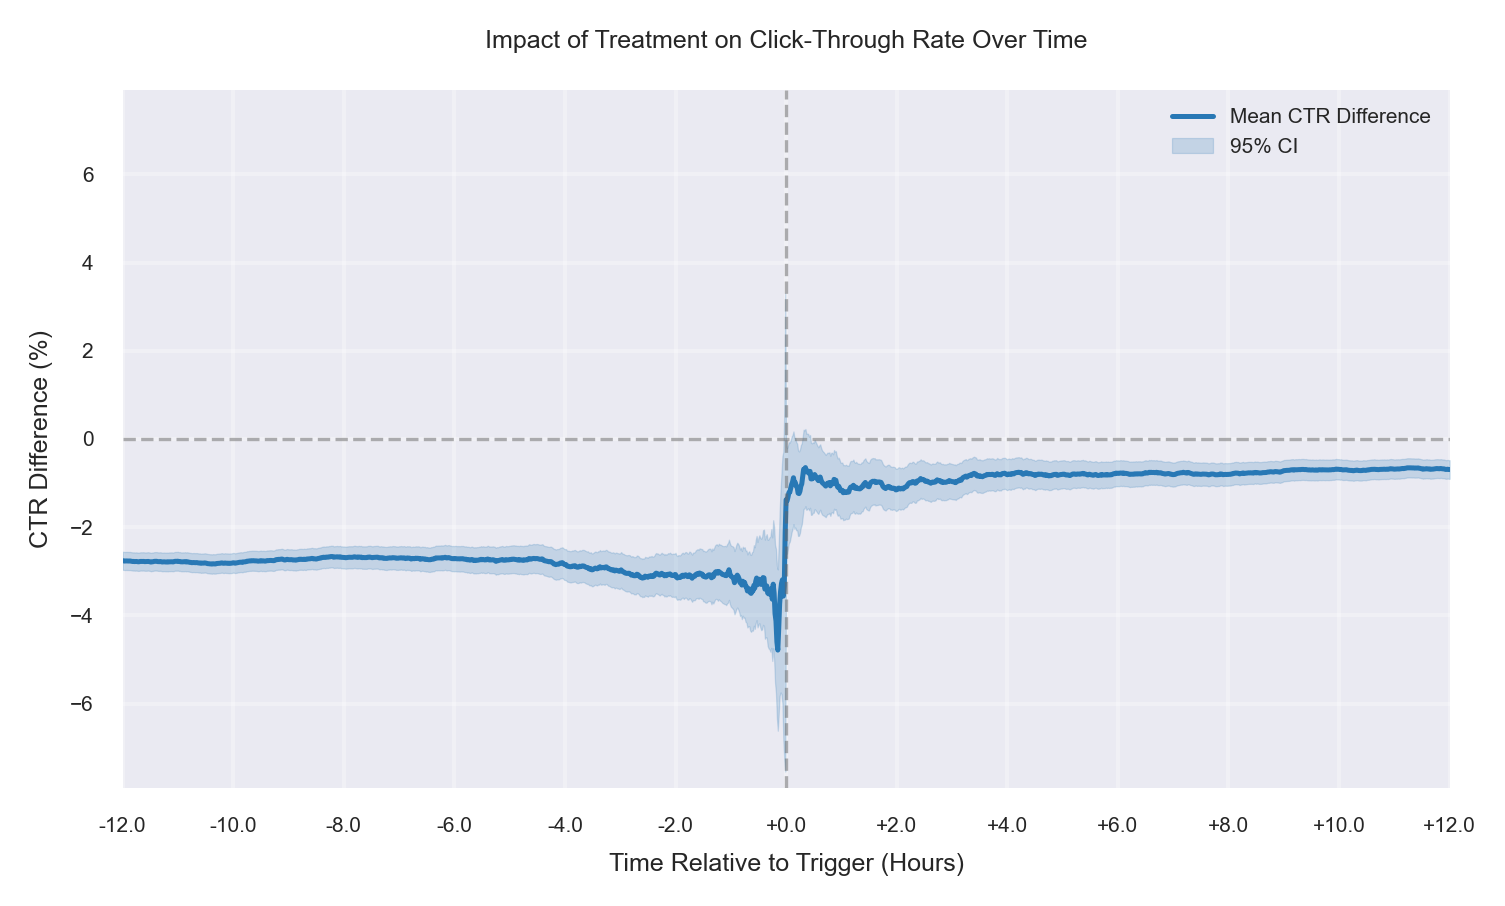

In [7]:

pivot_df_window, se = prepare_time_based_analysis(df, n_minutes=720)  # 12 hours
fig = plot_time_based_ctr(pivot_df_window, se, n_minutes=720)
plt.show()


Actual y-limits set in plot:
Lower y-limit: -7.919522
Upper y-limit: 7.919522


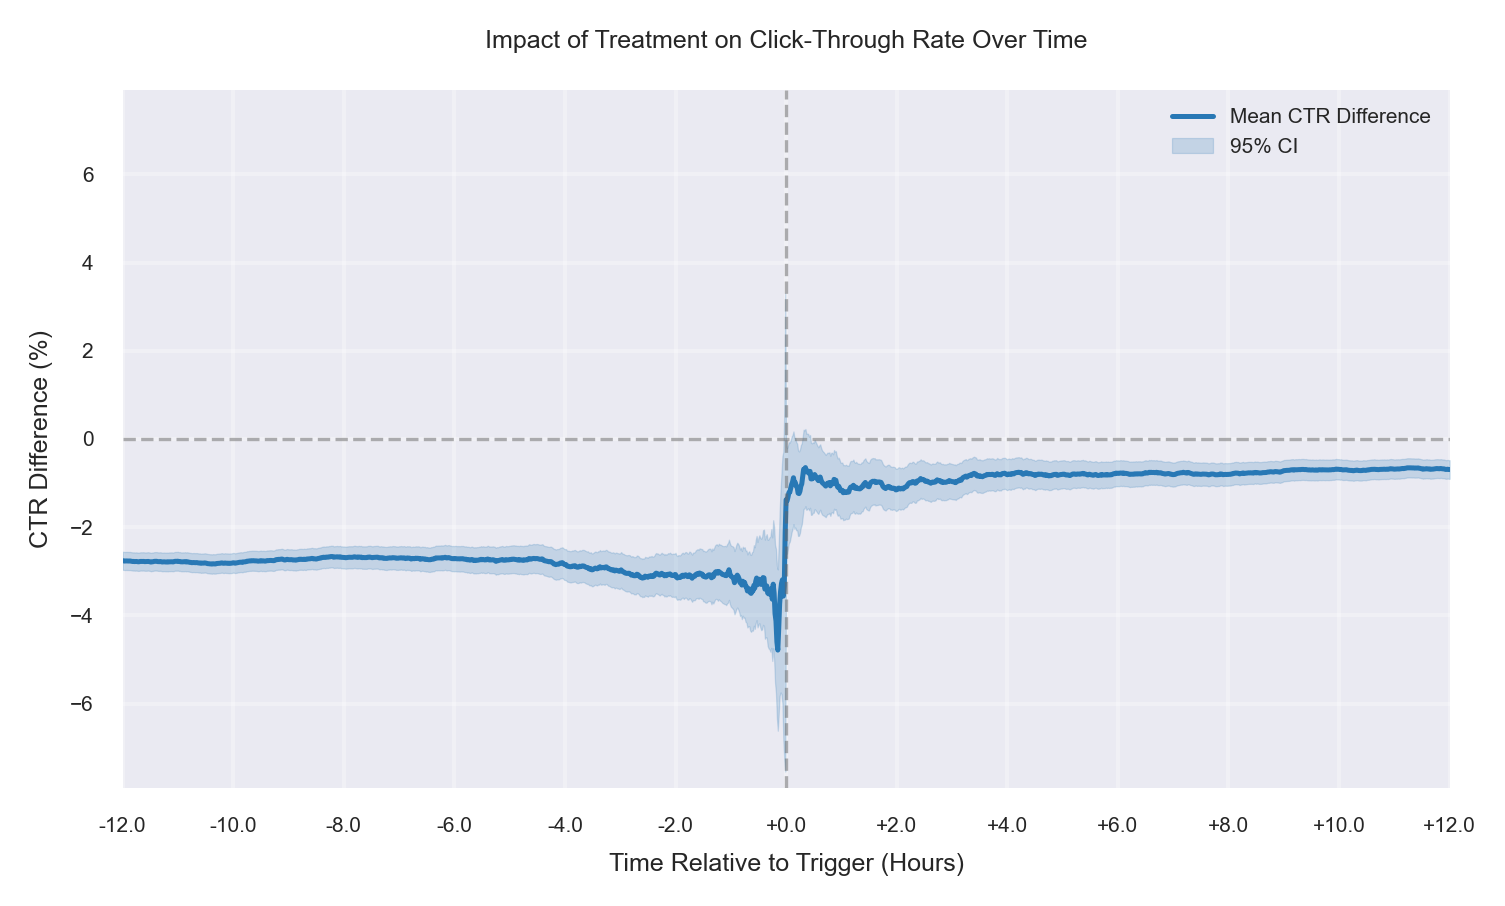

In [8]:

pivot_df_window, se = prepare_time_based_analysis(df, n_minutes=720)  # 12 hours
fig = plot_time_based_ctr(pivot_df_window, se, n_minutes=720)
plt.show()